In [1]:
import os

In [2]:
os.chdir("C:/Users/angel/Google Drive/09. Programming & Data Science/02. Python/03_vscode")
os.getcwd()

'C:\\Users\\angel\\Google Drive\\09. Programming & Data Science\\02. Python\\03_vscode'

In [73]:
stidin = "battery_life.txt"
charging_hours = []
battery_life = []
with open(stidin) as file:
     for line in file:
        #  print(line)
        # good practice: clean any extra character after the target line
         line = line.strip()
         line_split = line.split(',')
         charging_hours.append(float(line_split[0]))
         battery_life.append(float(line_split[1]))


Text(0.5, 1.0, 'Battery life vs charging hours')

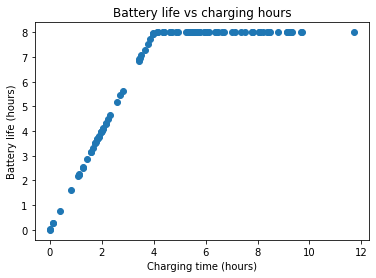

In [74]:
import matplotlib.pyplot as plt
# charging_hours.sort()
# battery_life.sort()
# plot x vs y
plt.plot(charging_hours, battery_life, 'o')
plt.xlabel("Charging time (hours)")
plt.ylabel("Battery life (hours)")
plt.title("Battery life vs charging hours")

There is a clear trend: until a threshold (located around x = 4), the battery life follows a linear trend with charging time. After that threshold, the battery life is "saturated" and reaches a plateau.

Therefore, I propose a spline-wise linear regression. Key point: identify the point x @ which our plateau is reached.

As this point is challenging, it is advisable to fit the regression model using spline OLS, to identify the two different regions.

In [62]:
len(battery_life)

100

In [96]:
import scipy.interpolate as interp
import numpy as np
# interp.splrep needs of sorted arrays, so we will sort both x and y
# to keep the same 121 correspondence between arrays, they are zipped first
charging_hours = np.array(charging_hours)
battery_life = np.array(battery_life)

sorted_indices = np.argsort()
charging_hours = charging_hours[sorted_indices]
battery_life = battery_life[sorted_indices]

spline_OLS = interp.UnivariateSpline(charging_hours, battery_life, k = 1, s = 0.01)

In [98]:
# Now, let's evaluate our model:
def predict_life_battery(new_charging_hour):
    return spline_OLS(new_charging_hour)

x_eval = np.linspace(min(charging_hours), max(charging_hours), 1000)
y_eval = [predict_life_battery(x) for x in x_eval]

x_eval = 4
np.round(predict_life_battery(x_eval),2)

7.93

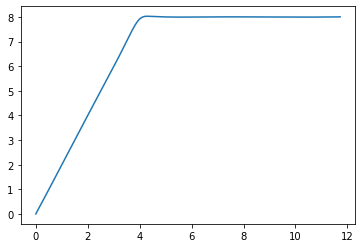

In [91]:
plt.plot(x_eval, y_eval)